# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Observable Trends

# 1: There is a moderate correlation between distance from equator and max temp

# 2: There is no correlation between distance from equator and cloudiness

# 3: There is no correlation between distance from equator and wind speed

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
cities_found = []
count = 0

for city in cities:
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Get weather data
    try: 
        print("(" + count + ")" "trying city: " + city)
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
    
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        temp_max.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        clouds.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        
        cities_found.append(city)
    except:
        
        print("Could not find: " + city)
    
    count = count + 1
    
    
    

Could not find: alihe
Could not find: rorvik
Could not find: cidreira
Could not find: anadyr
Could not find: hobyo
Could not find: disna
Could not find: karratha
Could not find: dikson
Could not find: kavieng
Could not find: lavrentiya
Could not find: hermanus
Could not find: mahebourg
Could not find: zhanaozen
Could not find: punta arenas
Could not find: kapaa
Could not find: kiruna
Could not find: carnarvon
Could not find: saldanha
Could not find: manoel urbano
Could not find: nikolskoye
Could not find: jiuquan
Could not find: leopold
Could not find: marsh harbour
Could not find: saint-philippe
Could not find: ushuaia
Could not find: zalantun
Could not find: myaundzha
Could not find: severo-kurilsk
Could not find: mouila
Could not find: nouadhibou
Could not find: mataura
Could not find: kathu
Could not find: evensk
Could not find: bethel
Could not find: bataipora
Could not find: berlevag
Could not find: nicoya
Could not find: illoqqortoormiut
Could not find: castro
Could not find: ri

In [10]:
cities_df = pd.DataFrame({
    "City": cities_found,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature (F)": temp_max,
    "Humidity (%)": humidity,
    "Cloudiness (%)": clouds,
    "Wind Speed (mph)": wind_speed,
    "Country": country,
    "Date": date
})

In [1]:
cities_df.head()

NameError: name 'cities_df' is not defined

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
cities_df.to_csv('cities.csv', index=False)
cities_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,atuona,-9.8000,-139.0333,76.50,63,44,11.34,PF,1661210391
1,bengkulu,-3.8004,102.2655,74.71,86,97,3.36,ID,1661210391
2,rikitea,-23.1203,-134.9692,70.48,70,24,14.09,PF,1661210392
3,flin flon,54.7682,-101.8650,69.64,49,40,4.61,CA,1661210392
4,bethel,41.3712,-73.4140,76.19,85,85,3.94,US,1661210393


In [17]:
cities_df.describe()

,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.046701,19.359893,68.163519,73.240575,57.910233,7.951023,1.661211e+09
std,32.450878,89.319590,13.862338,19.545638,38.435958,5.384823,1.000890e+02
min,-54.800000,-179.166700,33.910000,10.000000,0.000000,0.000000,1.661210e+09
25%,-5.089200,-58.650200,57.900000,64.000000,20.000000,3.960000,1.661210e+09
50%,22.616300,22.788200,70.480000,78.000000,71.000000,6.910000,1.661211e+09
75%,46.433300,98.333200,78.260000,88.000000,98.000000,10.960000,1.661211e+09
max,78.218600,179.316700,105.310000,100.000000,100.000000,31.070000,1.661211e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

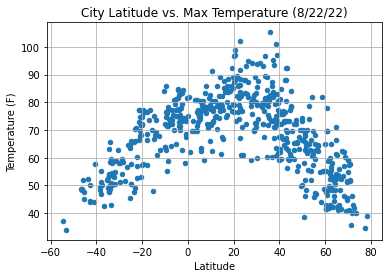

In [37]:
cities_df.plot(kind="scatter", x="Latitude", y="Temperature (F)", grid=True,
              title="City Latitude vs. Max Temperature (8/22/22)")
plt.savefig('Latitude_Temperature.png')
plt.show()

In [63]:
#This plot displays the relationship between max temperature and latitude

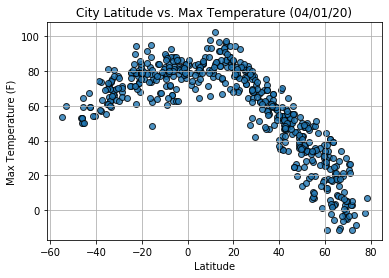

## Latitude vs. Humidity Plot

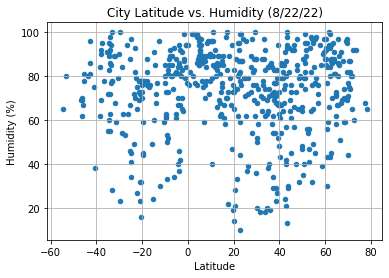

In [38]:
cities_df.plot(kind="scatter", x="Latitude", y="Humidity (%)", grid=True,
              title="City Latitude vs. Humidity (8/22/22)")
plt.savefig('Latitude_Humidity.png')
plt.show()

In [ ]:
# This plot displays the relationship between humidity and latitude

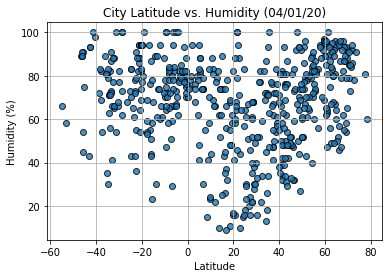

## Latitude vs. Cloudiness Plot

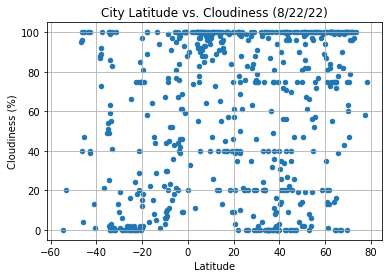

In [39]:
cities_df.plot(kind="scatter", x="Latitude", y="Cloudiness (%)", grid=True,
              title="City Latitude vs. Cloudiness (8/22/22)")
plt.savefig('Latitude_Cloudiness.png')
plt.show()

In [ ]:
# This plot displays the relationship between cloudiness and latitude

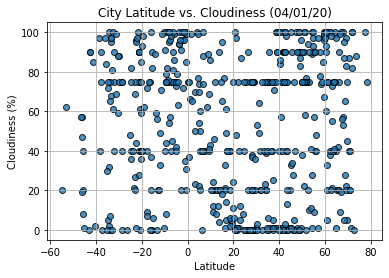

## Latitude vs. Wind Speed Plot

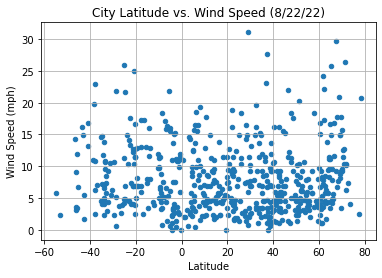

In [40]:
cities_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", grid=True,
              title="City Latitude vs. Wind Speed (8/22/22)")
plt.savefig('Latitude_WingSpeed.png')
plt.show()

In [ ]:
# This plot displays the relationship between wind speed and latitude

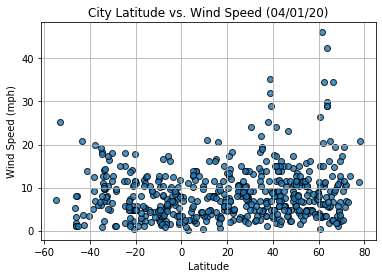

## Linear Regression

In [42]:
northern_df = cities_df.loc[cities_df["Latitude"] >= 0]
southern_df = cities_df.loc[cities_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.45629509076447217


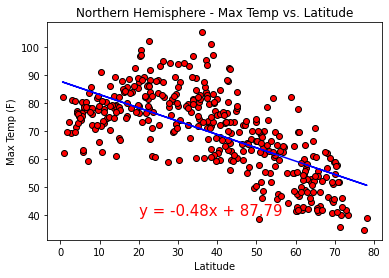

In [46]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Latitude"], northern_df["Temperature (F)"])
regress_values = northern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Latitude"], northern_df["Temperature (F)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This regression displays the relationship between 
# max temperature and latitude in the northern hemisphere.
# There is a moderate correlation.


The r-value is: 0.46937863826630627


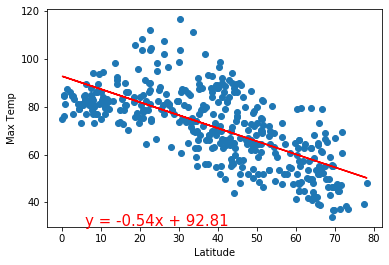

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6642323797142509


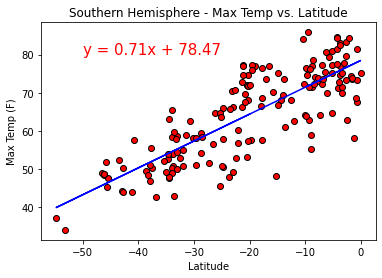

In [51]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Latitude"], southern_df["Temperature (F)"])
regress_values = southern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Latitude"], southern_df["Temperature (F)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(southern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This regression displays the relationship between 
# max temperature and latitude in the southern hemisphere.
# There is a moderate correlation.

The r-value is: 0.6082708688906918


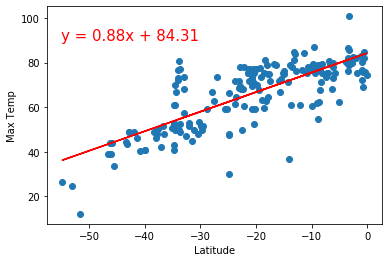

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006414285881778273


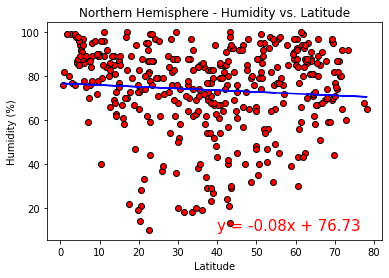

In [53]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Latitude"], northern_df["Humidity (%)"])
regress_values = northern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Latitude"], northern_df["Humidity (%)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This regression displays the relationship between 
# humidity and latitude in the northern hemisphere.
# There is very little correlation.

The r-value is: 0.000543987878808455


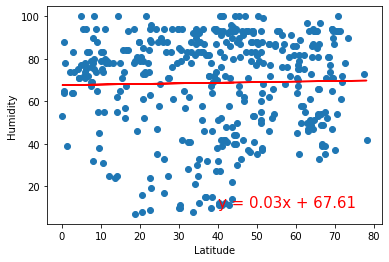

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 8.146146178060606e-05


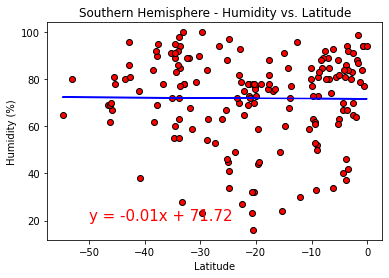

In [55]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Latitude"], southern_df["Humidity (%)"])
regress_values = southern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Latitude"], southern_df["Humidity (%)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(southern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This regression displays the relationship between 
# humidity and latitude in the southern hemisphere.
# There is very little correlation.

The r-value is: 0.014985174297345524


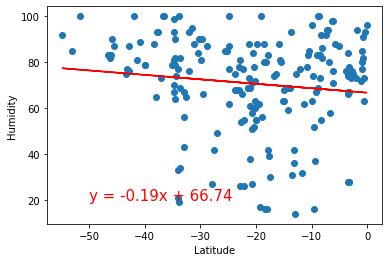

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0018199683608368078


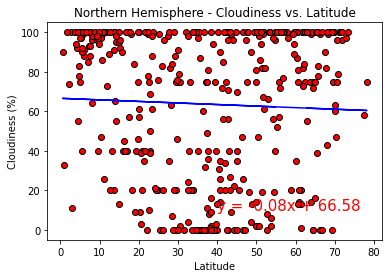

In [56]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Latitude"], northern_df["Cloudiness (%)"])
regress_values = northern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Latitude"], northern_df["Cloudiness (%)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This regression displays the relationship between 
# cloudiness and latitude in the northern hemisphere.
# There is very little correlation.

The r-value is: 0.0020898727664228514


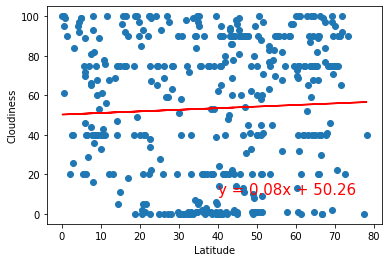

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012065481134180463


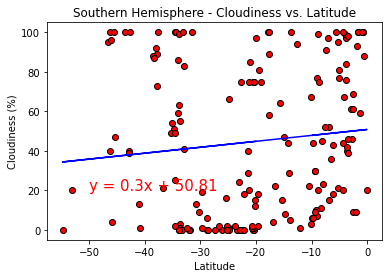

In [57]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Latitude"], southern_df["Cloudiness (%)"])
regress_values = southern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Latitude"], southern_df["Cloudiness (%)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(southern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This regression displays the relationship between 
# cloudiness and latitude in the southern hemisphere.
# There is very little correlation.

The r-value is: 0.0035263772085582894


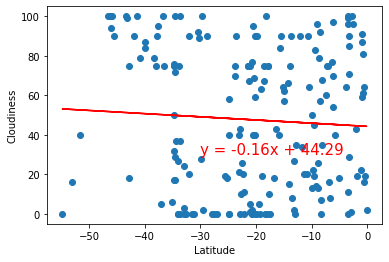

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013803811241202049


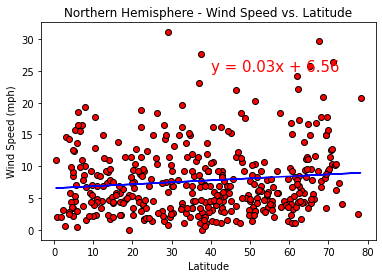

In [59]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Latitude"], northern_df["Wind Speed (mph)"])
regress_values = northern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Latitude"], northern_df["Wind Speed (mph)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This regression displays the relationship between 
# wind speed and latitude in the northern hemisphere.
# There is very little correlation.

The r-value is: 0.04019723576144484


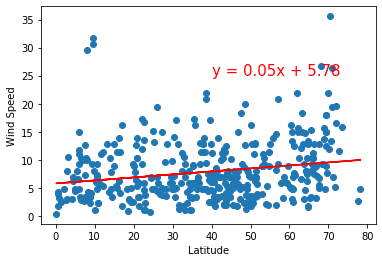

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0044263239607998574


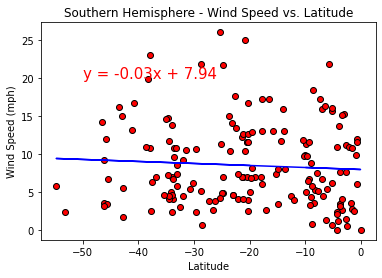

In [60]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Latitude"], southern_df["Wind Speed (mph)"])
regress_values = southern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Latitude"], southern_df["Wind Speed (mph)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(southern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This regression displays the relationship between 
# wind speed and latitude in the southern hemisphere.
# There is very little correlation.

The r-value is: 0.017128274759839232


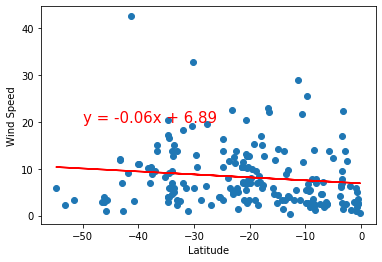